# NMDA homework 1, question 1
Linear Regression
王敏行 ID:2018012386 wangmx18@mails.tsinghua.edu.cn
Oct 22, 2021

Following codes are generated by myself, with the help of official documents and books. Codes in the last part refers to the demo from TA.

**Please keep the `utils.py` in the file so that codes in part 3 can run normally.**



In [18]:
#initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

iris = load_iris()
#target [0,1,2]=[setosa,versicolor,virginica]
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target']) #transform 'Bunch' into 'dataframe'

## Part1: matrix scatter plot

D:\extensions\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


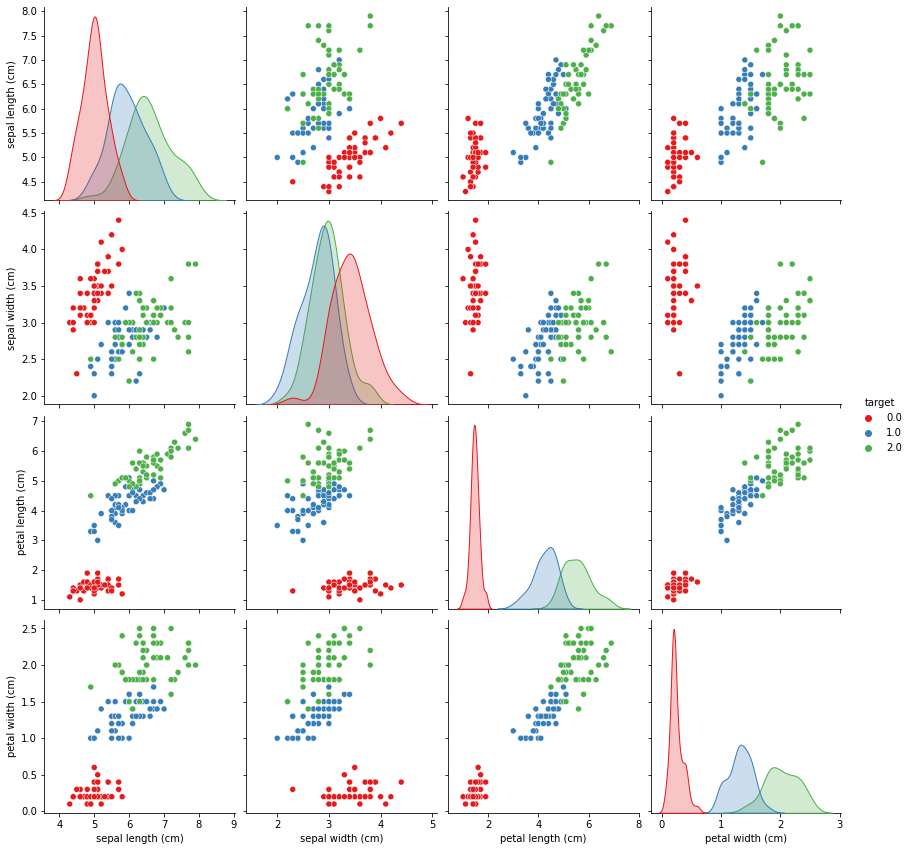

In [11]:
import seaborn as sns
g = sns.pairplot(df,hue='target', palette='Set1',size=3)

## Part2: Linear regression

Regression function is y=-0.22336106112989984*x+6.526222550894481
R^2 is 0.013822654141080859


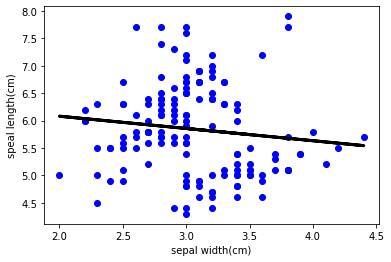

In [12]:
#question 2: Linear regression
reg = LinearRegression()
# x,y = df.loc[: ,['petal length (cm)','petal width (cm)']]
d = iris.data
sl = d[:,0].reshape(-1,1)
sw = d[:,1].reshape(-1,1)
pl = d[:,2].reshape(-1,1)
pw = d[:,3].reshape(-1,1)

# Linear regression on sepal width and length
reg.fit(sw, sl)
y_pred = reg.predict(sw)
w,b=[reg.coef_, reg.intercept_]
print('Regression function is y={}*x+{}'.format(w[0][0],b[0]))
print('R^2 is', reg.score(sw, sl))

# plotting
plt.scatter(sw,sl,color='blue')
plt.plot(sw, y_pred, color='black', linewidth=3)
plt.xlabel(('sepal width(cm)'))
plt.ylabel(('speal length(cm)'))
plt.show()

Regression function is y=2.229940495121864*x+1.0835580328505112
R^2 is 0.9271098389904927


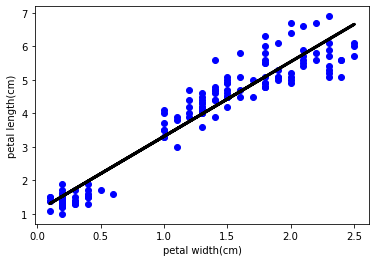

In [13]:
# Linear regression on petal width and length
reg.fit(pw, pl)
y_pred = reg.predict(pw)
w,b=[reg.coef_, reg.intercept_]
print('Regression function is y={}*x+{}'.format(w[0][0],b[0]))
print('R^2 is', reg.score(pw, pl))

# plotting
plt.scatter(pw,pl,color='blue')
plt.plot(pw, y_pred, color='black', linewidth=3)
plt.xlabel(('petal width(cm)'))
plt.ylabel(('petal length(cm)'))
plt.show()

The R^2 of sepal width and length is **0.014**, while the R^2 of petal width and length is **0.927**.

Thus, it can be conclude that the relationship between width and length of petal is much more **linear coefficient** than that of sepal in iris.

## Part3: Logistic regression discrimination

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[:,[0,1]]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  shuffle=5)

clf = LogisticRegression()
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print(train_score, test_score)

0.8083333333333333 0.8333333333333334


In [15]:
from sklearn.datasets import load_iris

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
#target [0,1,2]=[setosa,versicolor,virginica](0:49,50:99,100:149)
# iristype = df['target'].unique()
# x_se = df[df['target'].isin([iristype[0]])]
# x_vs = df[df['target'].isin([iristype[1]])]
# x_vg = df[df['target'].isin([iristype[2]])]
x1 = np.array(df.iloc[0:99,[0,1]])
y1 = np.array(df.iloc[0:99,4])
x2 = np.array(df.iloc[50:149,[0,1]])
y2 = np.array(df.iloc[50:149,4])

### setosa & versicolor

D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


elaspe: 0.456354


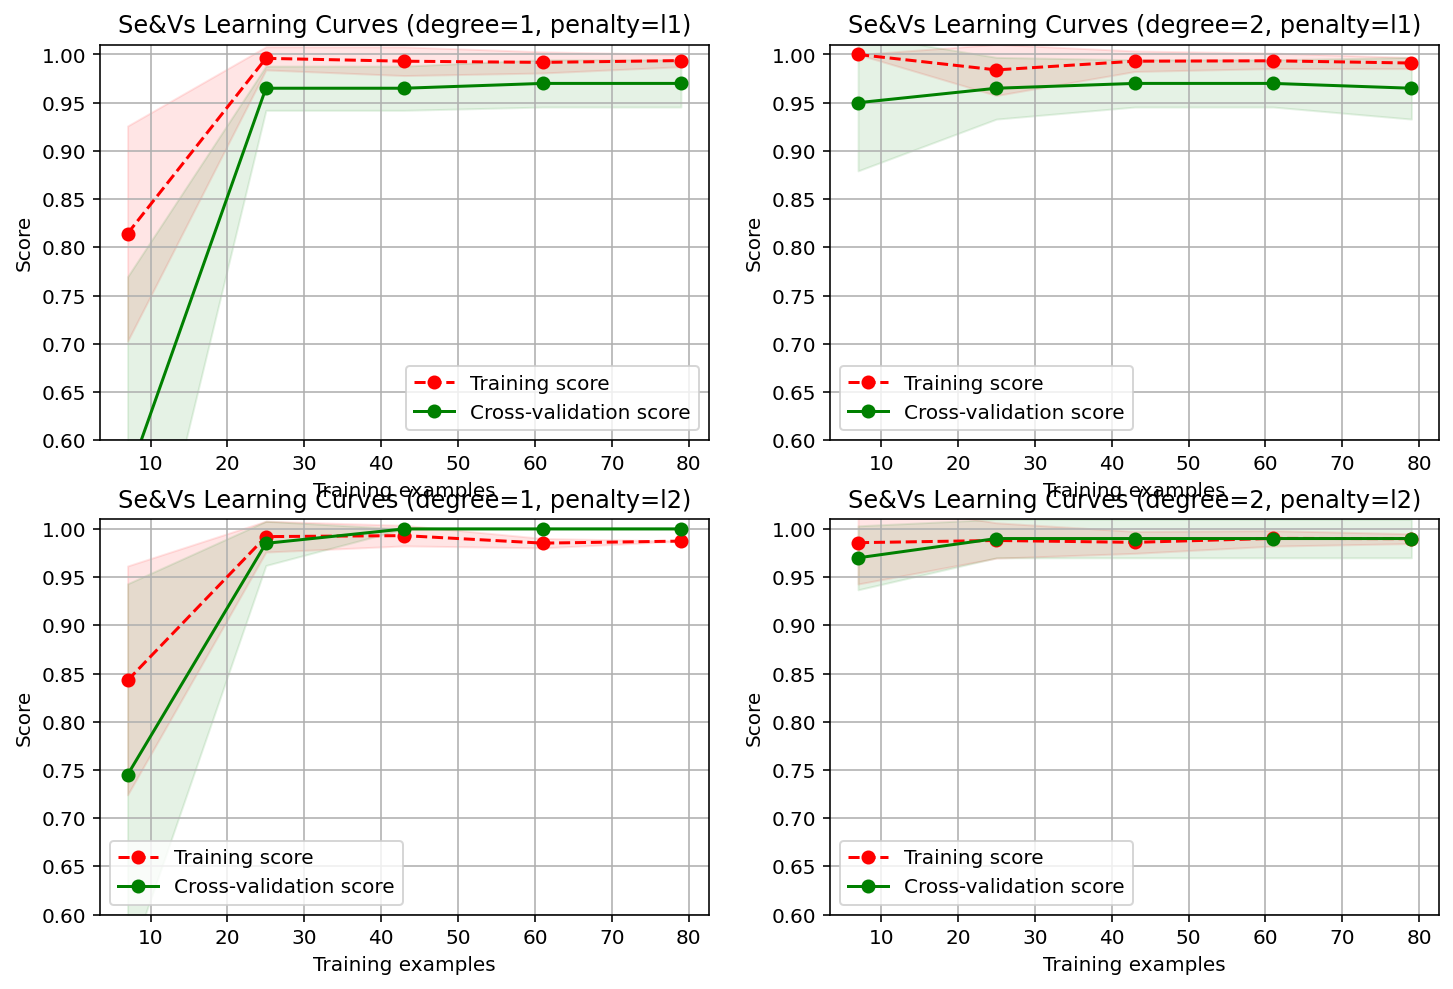

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    
    #logistic_regression = LogisticRegression(C=1, penalty='l1', solver='liblinear')
    logistic_regression = LogisticRegression(**kwarg,solver='liblinear')
    pipeline = Pipeline([("polynomial_features", polynomial_features),("logistic_regression", logistic_regression)])
    return pipeline

from utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

import time
cv = ShuffleSplit(test_size=0.2) #random_state=0
title = 'Se&Vs Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = ['l1','l2']

start = time.perf_counter()
plt.figure(figsize=(12, 8), dpi=144)
for i in range(len(degrees)):
    for j in range(len(penalty)):
        plt.subplot(len(penalty), len(degrees), len(penalty)*j+i + 1)
        plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty[j]), 
                            title.format(degrees[i], penalty[j]), x1, y1, ylim=(0.6, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))

### versicolor & virginica

D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\extensions\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

elaspe: 0.425283


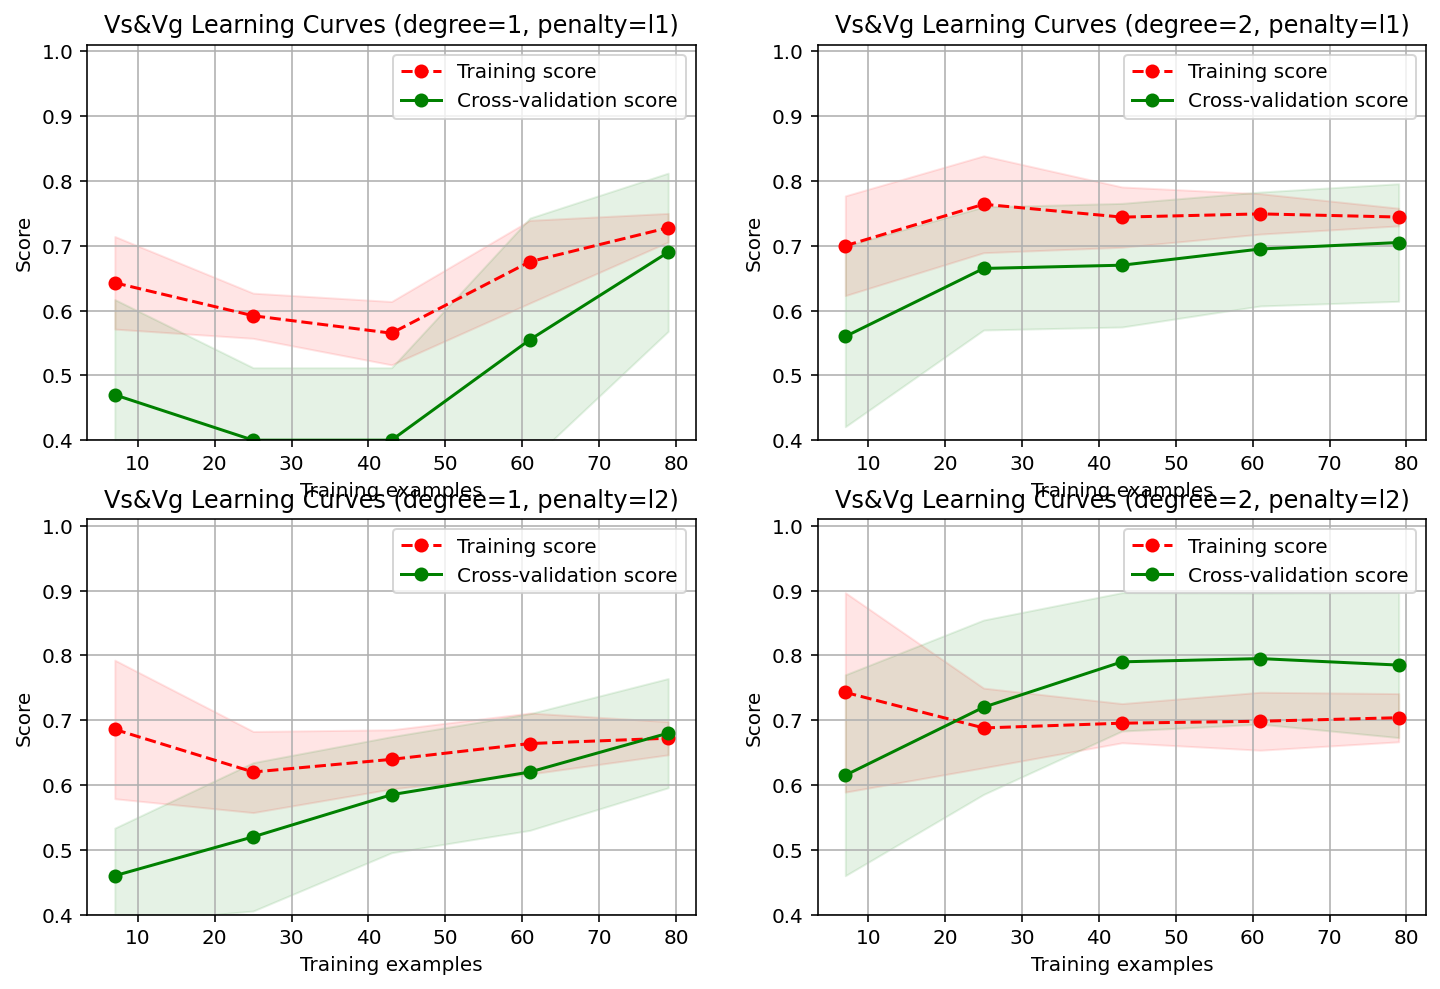

In [17]:
title = 'Vs&Vg Learning Curves (degree={0}, penalty={1})'
start = time.perf_counter()
plt.figure(figsize=(12, 8), dpi=144)
for i in range(len(degrees)):
    for j in range(len(penalty)):
        plt.subplot(len(penalty), len(degrees), len(penalty)*j+i + 1)
        plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty[j]), 
                            title.format(degrees[i], penalty[j]), x2, y2, ylim=(0.4, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))

We can conclude that the accuracy on *Setosa* and *Vesicolor* is 100%, while that on *Vesicolor* and *Virginica* is approximate 60~80%, depending on the random number applied with train_test_splitter.
For both datasets, 2-degreed classifier with l2 penalty have the best accuracy.